<a href="https://colab.research.google.com/github/yasminmulla/CaseStudy/blob/Aerofit/aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> <b> ***Project CaseStudy : Aerofit*** </b> </h1>

<h2> <i>
    

<li>**1. Data Reading and Cleaning**</li>
<li>**2. Missing Value and Outlier Detection** </li>
<li>**3. Problem Statement and Analysing basic metrics** </li>
<li>**4. Non-Graphical Analysis**</li>
<li>**5. Visual Analysis** </li>
<li>**6. Business Insights**  </li>
<li>**7. Recommendations** </li>

</i> </h2>

In [ ]:
##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>  
    <li>**1. Data Reading and Cleaning**</li>
    <li>**2. Missing Value and Outlier Detection** </li>   
</h2>

In [ ]:
##
aerofit_df = pd.read_csv('AeroFit/aerofit_treadmill.csv')

In [ ]:
aerofit_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
aerofit_df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


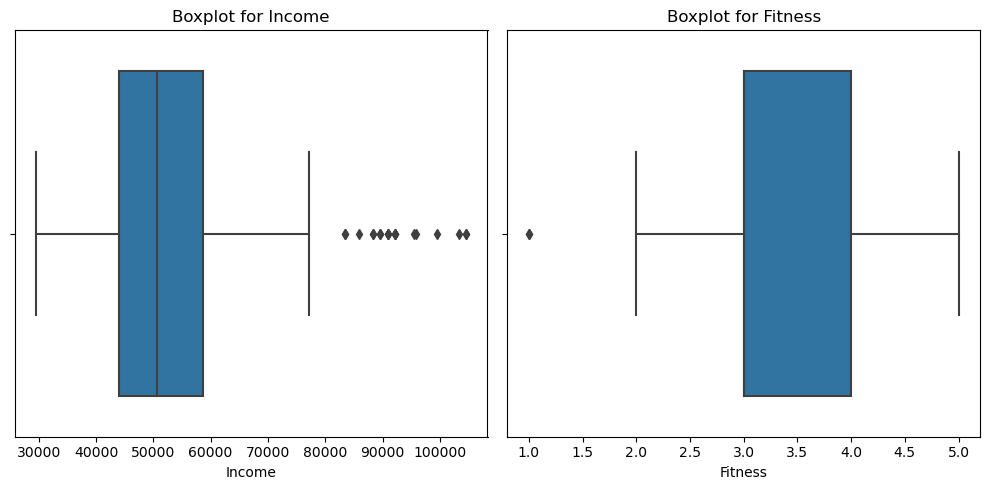

In [ ]:
# Boxplot for find outlier of income and fitness

plt.figure(figsize=(10, 5))

# Boxplot for Income
plt.subplot(1, 2, 1)
sns.boxplot(x=aerofit_productprice_df['Income'])
plt.xlabel('Income')
plt.title('Boxplot for Income')

# Boxplot for Fitness
plt.subplot(1, 2, 2)
sns.boxplot(x=aerofit_productprice_df['Fitness'])
plt.xlabel('Fitness')
plt.title('Boxplot for Fitness')

plt.tight_layout()
plt.show()

In [ ]:
# Function to detect outliers using the IQR method
def find_outliers(column):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Find outliers in the 'Income' column
income_outliers = find_outliers(aerofit_productprice_df['Income'])

# Find outliers in the 'Fitness' column
fitness_outliers = find_outliers(aerofit_productprice_df['Fitness'])

# Display the outliers
print("Outliers in 'Income' column:")
print(income_outliers)

print("\nOutliers in 'Fitness' column:")
print(fitness_outliers)


Outliers in 'Income' column:
159     83416
160     88396
161     90886
162     92131
164     88396
166     85906
167     90886
168    103336
169     99601
170     89641
171     95866
172     92131
173     92131
174    104581
175     83416
176     89641
177     90886
178    104581
179     95508
Name: Income, dtype: int64

Outliers in 'Fitness' column:
14     1
117    1
Name: Fitness, dtype: int64


<h5><b> <i> Data looks incredibly neat and clean. there is no missing data found. Datatype of all columns are well defined.
    </i> </b> <h5>
<h5><b> <i> Approximately  income more than 80000 are outlier and fitness level 1 is outlier
    </i> </b> <h5>

<h2> <i> **3. Problem Statement and Analysing basic metrics** </i> </h2>
<h4> Problem Statement: Find customer profile after doing all analysis on Aerofit data using visual effects and probability  <h4>

In [ ]:
aerofit_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


<h5> <i>
<ol>
    <li>Age:The standard deviation of age is around 6.94, indicating that the ages are somewhat spread out around the mean </li>
     <li>Education:The education level of customers in the dataset ranges from 12 to 21 years, with an average education level of approximately 15.57 years  </li>
    <li>Usage:The average usage of the product is approximately 3.46, with a minimum of 2 and a maximum of 7. The standard deviation of usage is around 1.08, suggesting some variability in product usage among customers.  </li>
    <li>Fitness:The standard deviation of fitness is around 0.96, indicating variability in fitness levels among customers  </li>
    <li>Income:The standard deviation of around 16506.68, indicating a relatively wide spread in income levels among customers  </li>
    <li>Mile:The standard deviation of miles is around 51.86, showing some variability in the distance covered by customers  </li>
    </ol>
</i> </h5>

<h2><b><i> **4. Non-Graphical Analysis** </i> </b> <h2>

In [ ]:
aerofit_df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
aerofit_df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
aerofit_df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

•	The KP281 is an entry-level treadmill that sells for $1,500.
•	The KP481 is for mid-level runners that sell for $1,750.
•	The KP781 treadmill is having advanced features that sell for $2,500.


In [ ]:
product_df = aerofit_df['Product'].value_counts()
KP281_TotalSellValue = product_df[product_df.index =='KP281'][0]*1500
KP481_TotalSellValue = product_df[product_df.index =='KP281'][0]*1750
KP781_TotalSellValue = product_df[product_df.index =='KP281'][0]*2550
TotalSellValue_ds=[KP281_TotalSellValue,KP481_TotalSellValue,KP781_TotalSellValue]
product_df = pd.DataFrame(product_df)
product_df['Total_Sale_Amount']= TotalSellValue_ds
product_df

,Product,Total_Sale_Amount
KP281,80,120000
KP481,60,140000
KP781,40,204000


In [ ]:
aerofit_df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [ ]:
# Product count by Gender, Marital Status and Income < 53719.57 , this is avrage income get by 'discribe()'
Gender = aerofit_df['Gender']
MaritalStatus = aerofit_df['MaritalStatus']
Product = aerofit_df['Product']
Income = aerofit_df['Income'] < 53719.57

product_gender_income_df =  pd.crosstab([Gender, MaritalStatus, Income], Product)
product_gender_income_df

Product                      KP281  KP481  KP781
Gender MaritalStatus Income                     
Female Partnered     False       5      3      4
                     True       22     12      0
       Single        False       3      3      1
                     True       10     11      2
Male   Partnered     False       7      5     18
                     True       14     16      1
       Single        False       3      2      9
                     True       16      8      5

<h2> <b> <i> **5 Visual Analysis**</i> </b> <h2>

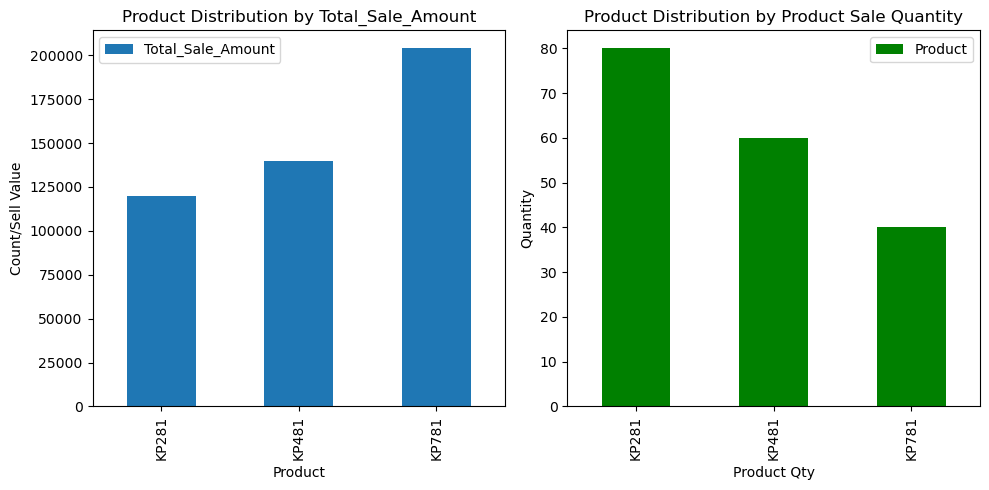

In [ ]:
# Boxplot for find outlier of income and fitness


# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Boxplot for Total_Sale_Amount
product_df[['Total_Sale_Amount']].plot(kind='bar', ax=axes[0])

# Set the labels and title for the first subplot
axes[0].set_xlabel('Product')
axes[0].set_ylabel('Count/Sell Value')
axes[0].set_title('Product Distribution by Total_Sale_Amount')

# Bar chart for Product Sale Quantity
product_df[['Product']].plot(kind='bar', ax=axes[1], color='green')

# Set the labels and title for the second subplot
axes[1].set_xlabel('Product Qty')
axes[1].set_ylabel('Quantity')
axes[1].set_title('Product Distribution by Product Sale Quantity')

plt.tight_layout()
plt.show()


<h5> <i>  
    <ol>
          <li>
            The total sale amount is influenced not only by the price of the product but also by the quantity sold. Despite having the highest total sale amount, KP781 sold the fewest units, suggesting that it might have a higher price compared to the other products.
        </li>
          <li>
            KP781 has the highest total sale amount, indicating that it is the best-performing product in terms of revenue generated.KP281 has highest sales in term of quantity
        </li>
    </ol>
    </i> </h5>

In [ ]:
aerofit_df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


In [ ]:
type(product_gender_income_df)

pandas.core.frame.DataFrame

In [ ]:
df = aerofit_df[['Gender','MaritalStatus','Miles']]
df.head(3)

,Gender,MaritalStatus,Miles
0,Male,Single,112
1,Male,Single,75
2,Female,Partnered,66


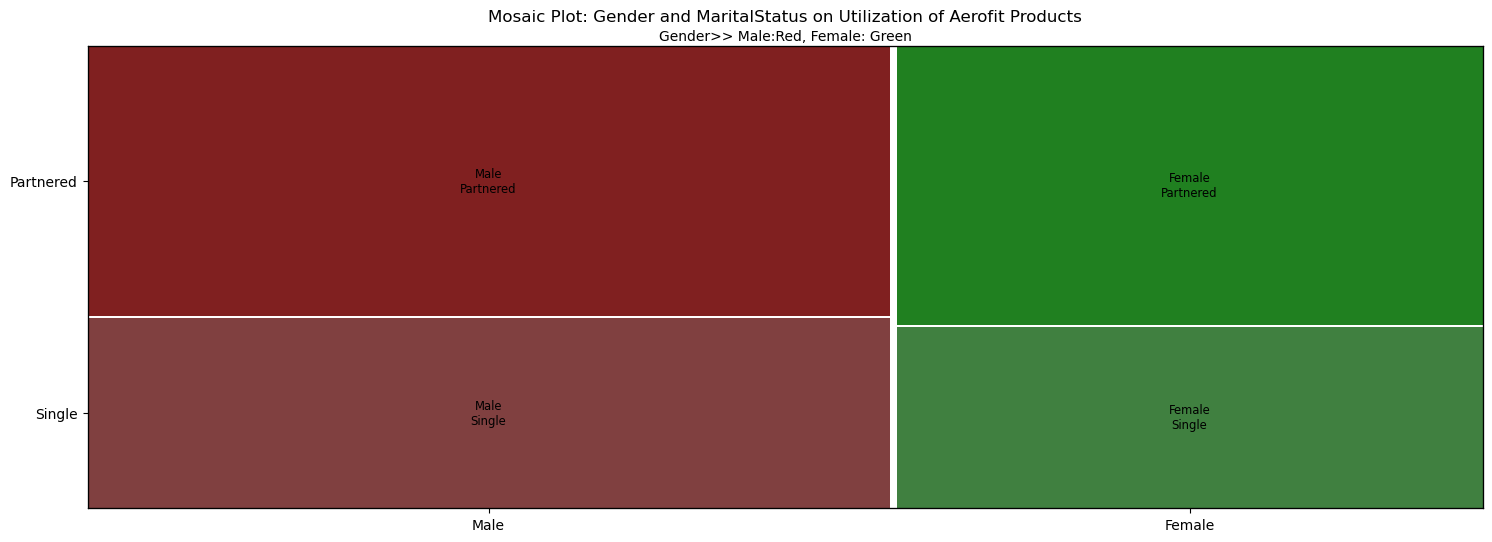

In [ ]:
df_Miles = aerofit_df[['Gender','MaritalStatus','Miles']]
mosaic(df_Miles, ['Gender', 'MaritalStatus'], title='Mosaic Plot: Gender and MaritalStatus on Utilization of Aerofit Products')
plt.xlabel('Gender>> Male:Red, Female: Green')
plt.ylabel('Marital Status')
plt.show()

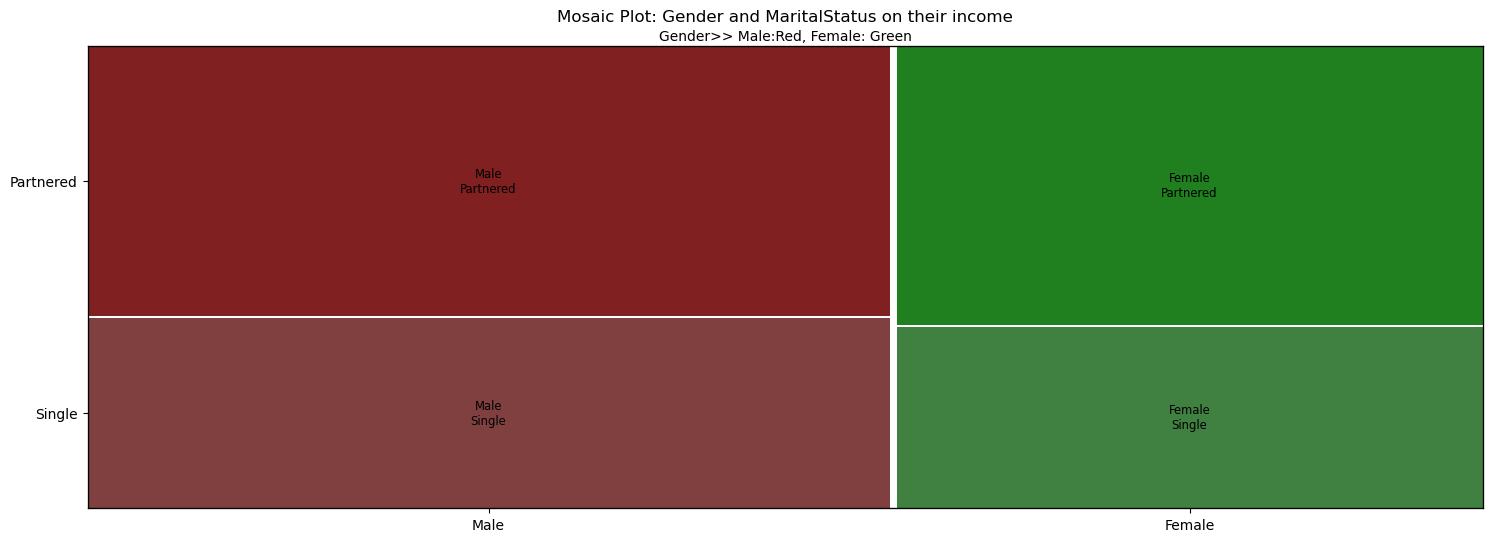

In [ ]:
df_income = aerofit_df[['Gender','MaritalStatus','Income']]
mosaic(df_income, ['Gender', 'MaritalStatus'], title='Mosaic Plot: Gender and MaritalStatus on their income')
plt.xlabel('Gender>> Male:Red, Female: Green')
plt.ylabel('Marital Status')
plt.show()

<h5> <i>  
    <ol>
        <li>
            Product Preference by Gender and Marital Status: We can see the counts of each product purchased by customers based on their gender and marital status.
            For example, female customers who are partnered and have a below avarage income value tend to purchase KP281 and KP481 more than KP781.
        </li>
          <li>
            By examining the counts based on the Income category, we can see that customers with avarage income values tend to purchase fewer units of KP781 compared to those with False income values.
            This may indicate that KP781 is relatively more expensive and is preferred by customers with higher incomes.
        </li>
          <li>
            male customers who are single and Partnered , and both have a higher income value tend to purchase more units of KP781 compared to other products.
        </li>
    </ol>
    </i>
</h5>

In [ ]:
##
product_price_dt=  {
    'Product': ['KP281', 'KP481', 'KP781'],
    'Price': [1500, 1750, 2500]
}
product_price_df = pd.DataFrame(product_price_dt)
product_price_df

,Product,Price
0,KP281,1500
1,KP481,1750
2,KP781,2500


In [ ]:
aerofit_df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


In [ ]:
##
aerofit_productprice_df = pd.merge(left=aerofit_df, right=product_price_df.rename(columns={'Price': 'Product_Price'}),
                     how='left', on='Product')

In [ ]:
aerofit_productprice_df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_Price
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500


In [ ]:
##
aerofit_productprice_df = pd.merge(left=aerofit_df, right=product_price_df.rename(columns={'Price': 'Product_Price'}),
                     how='left', on='Product')
grouped_df = aerofit_productprice_df.groupby(['MaritalStatus','Product'])['Product_Price'].sum()
grouped_df

MaritalStatus  Product
Partnered      KP281      72000
               KP481      63000
               KP781      57500
Single         KP281      48000
               KP481      42000
               KP781      42500
Name: Product_Price, dtype: int64

In [ ]:
##
aerofit_productprice_df = pd.merge(left=aerofit_df, right=product_price_df.rename(columns={'Price': 'Product_Price'}),
                                   how='left', on='Product')


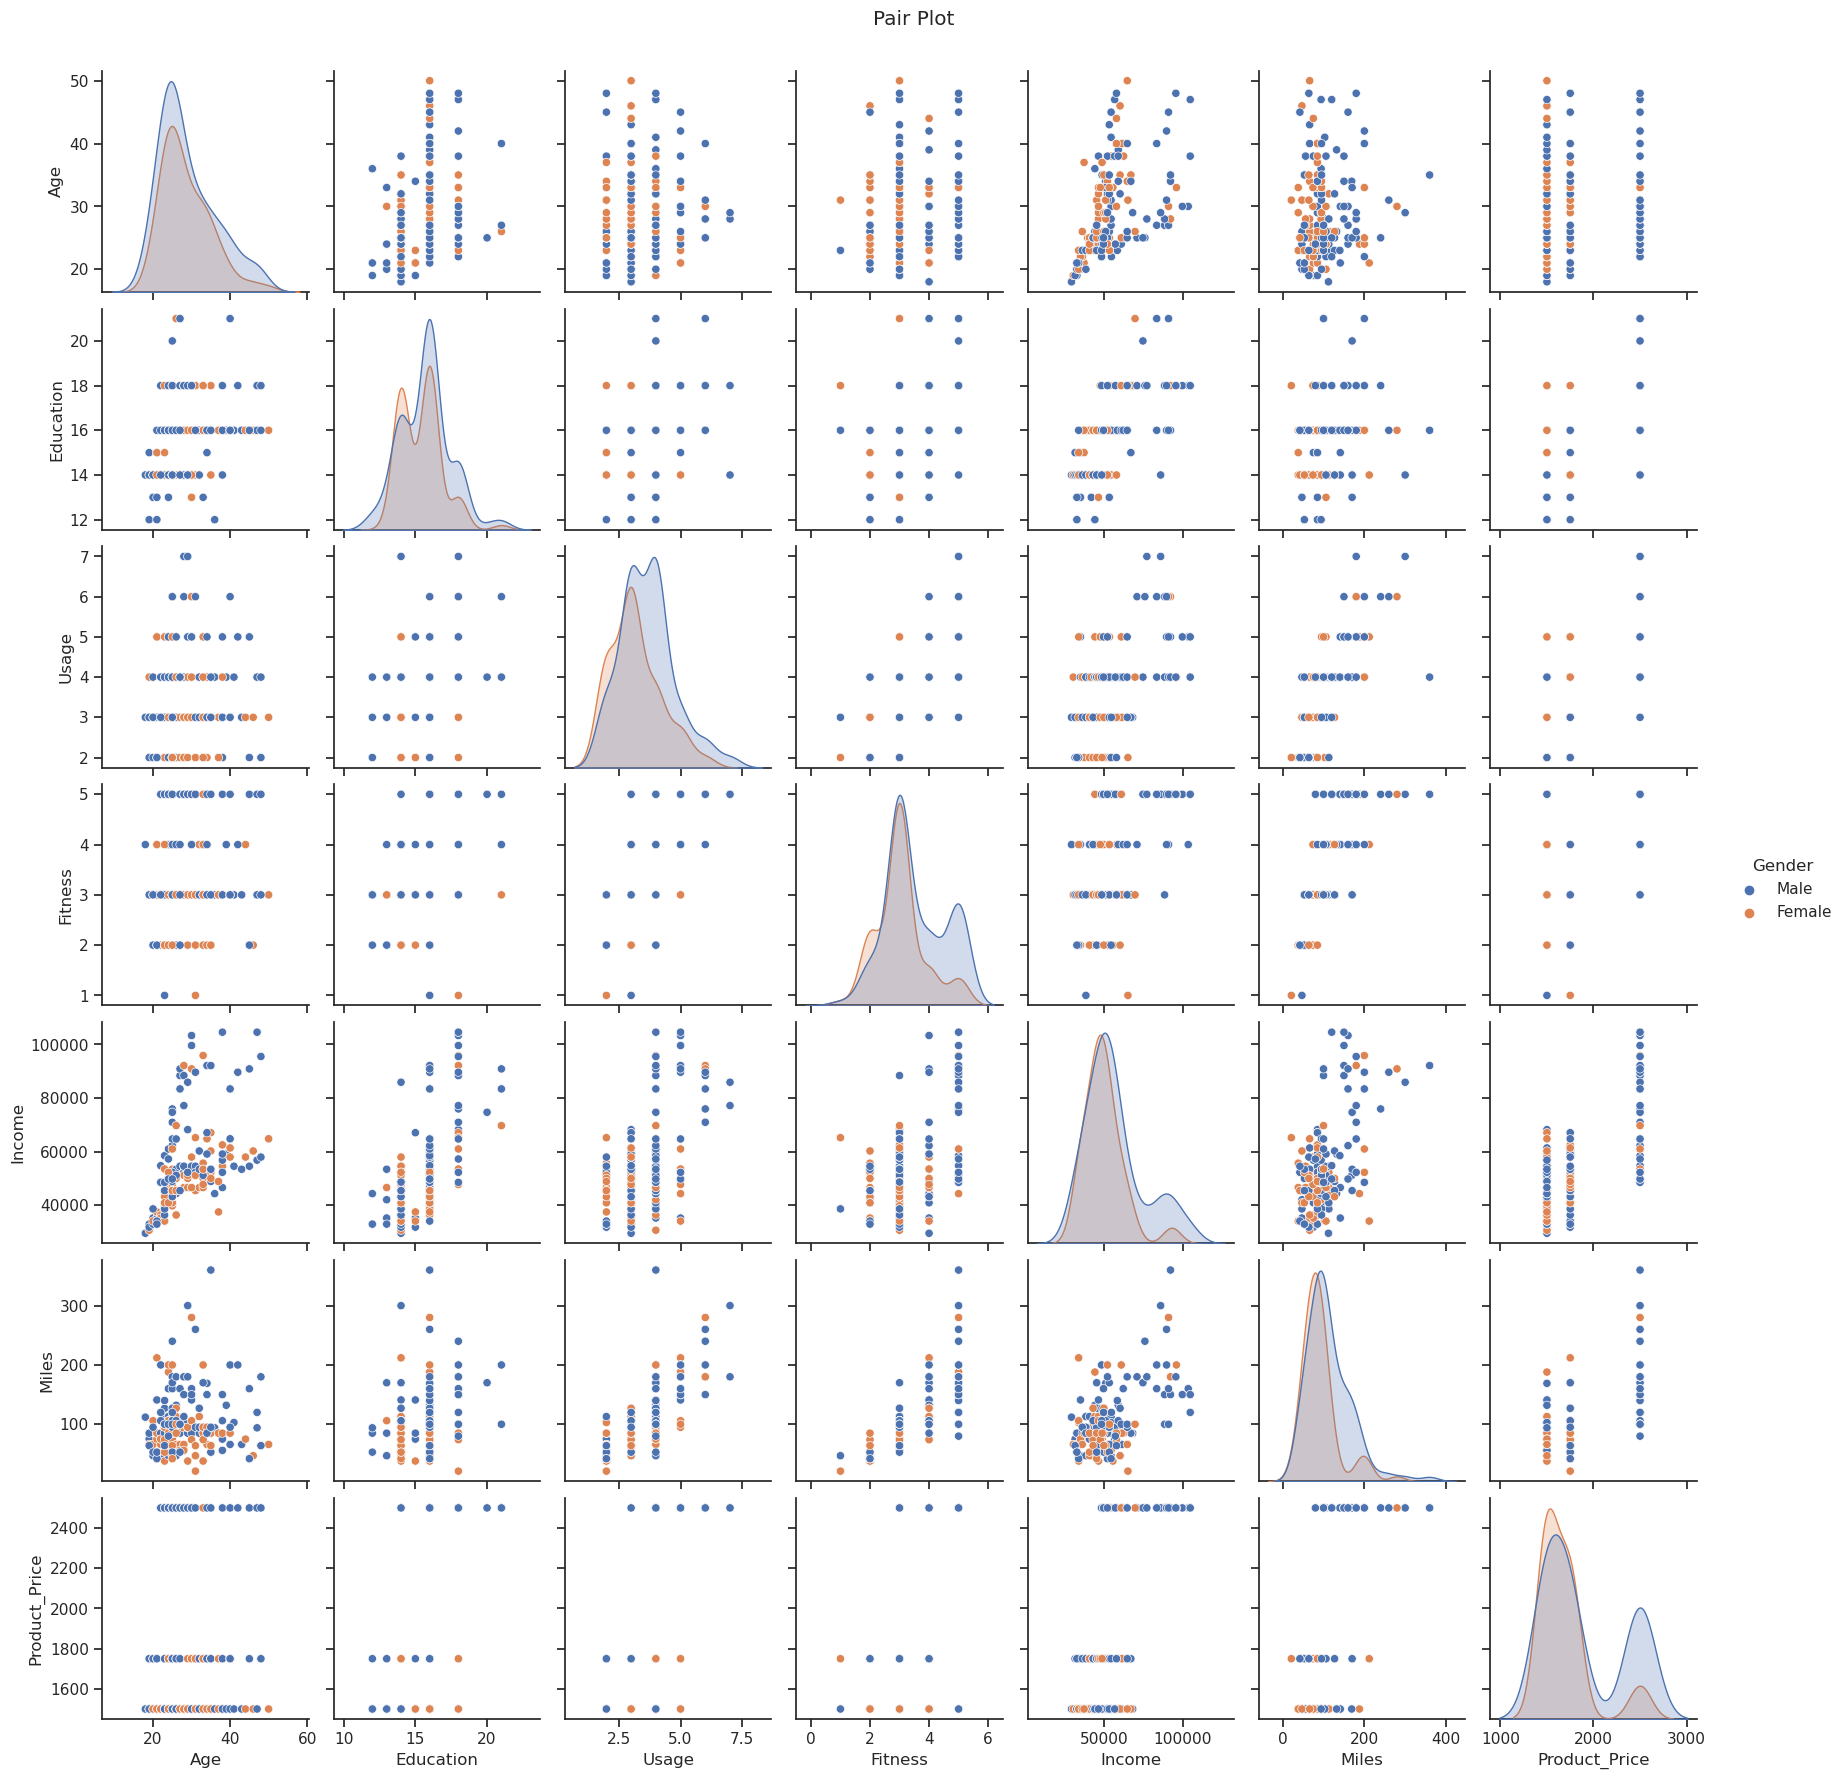

In [ ]:

# Pair plot
sns.pairplot(aerofit_productprice_df,hue='Gender')
plt.suptitle('Pair Plot', y=1.02)
plt.show()

In [ ]:
aerofit_productprice_df['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [ ]:
##
age_bins = [17, 35, 50, float('inf')]  # (18, 35] for younger, (35, 50] for adult, (50, inf) for senior

# Define labels for the bins
age_labels = ['Younger', 'Adult', 'Senior']

# Use pd.cut() to categorize ages into bins
aerofit_productprice_df['Age_Group'] = pd.cut(aerofit_productprice_df['Age'], bins=age_bins, labels=age_labels)

In [ ]:
aerofit_productprice_df[aerofit_productprice_df['Age']==50]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_Price,Age_Group
79,KP281,50,Female,16,Partnered,3,3,64809,66,1500,Adult


In [ ]:
# Group by 'MaritalStatus' and 'Product' and calculate the sum of 'Product_Price'
grouped_df = aerofit_productprice_df.groupby(['Age_Group', 'Product'])['Product_Price'].sum().reset_index()
grouped_df

,Age_Group,Product,Product_Price
0,Younger,KP281,99000
1,Younger,KP481,91000
2,Younger,KP781,85000
3,Adult,KP281,21000
4,Adult,KP481,14000
5,Adult,KP781,15000
6,Senior,KP281,0
7,Senior,KP481,0
8,Senior,KP781,0


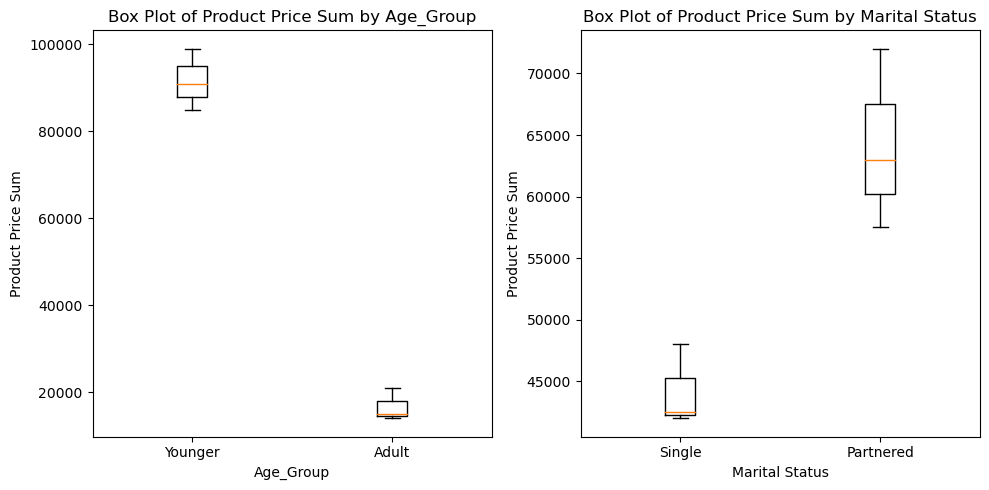

In [ ]:

# Group by 'MaritalStatus' and 'Product' and calculate the sum of 'Product_Price'
grouped_df = aerofit_productprice_df.groupby(['Age_Group', 'Product'])['Product_Price'].sum().reset_index()

# Create the countplot for 'Gender'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot([grouped_df[grouped_df['Age_Group'] == 'Younger']['Product_Price'],
             grouped_df[grouped_df['Age_Group'] == 'Adult']['Product_Price']],
            labels=['Younger', 'Adult']  )
plt.xlabel('Age_Group')
plt.ylabel('Product Price Sum')
plt.title('Box Plot of Product Price Sum by Age_Group')

# Create the histogram for 'Product_Price'
plt.subplot(1, 2, 2)
# Group by 'MaritalStatus' and 'Product' and calculate the sum of 'Product_Price'
grouped_df = aerofit_productprice_df.groupby(['MaritalStatus', 'Product'])['Product_Price'].sum().reset_index()

# Create a box plot

plt.boxplot([grouped_df[grouped_df['MaritalStatus'] == 'Single']['Product_Price'],
             grouped_df[grouped_df['MaritalStatus'] == 'Partnered']['Product_Price']],
            labels=['Single', 'Partnered'])
plt.xlabel('Marital Status')
plt.ylabel('Product Price Sum')
plt.title('Box Plot of Product Price Sum by Marital Status')


# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()

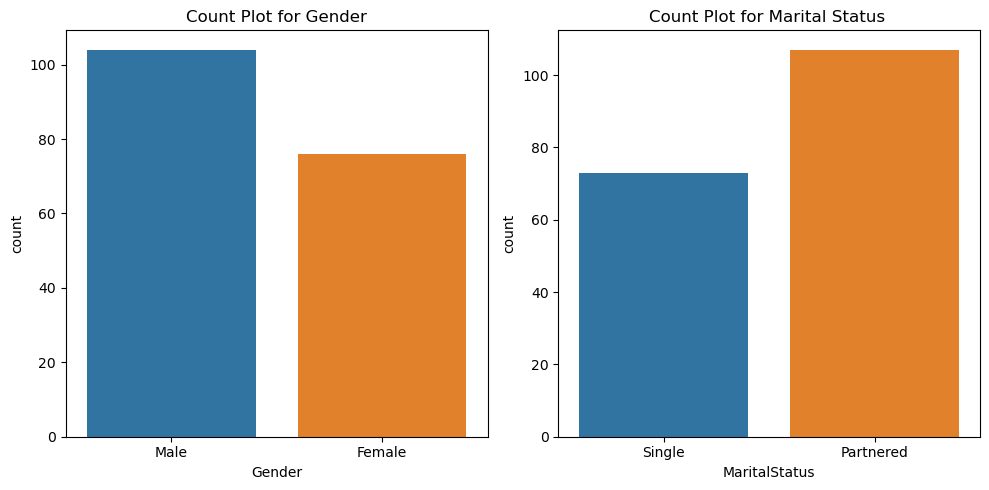

In [ ]:
# Create the countplot for 'Gender'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=aerofit_df, x='Gender')
plt.title('Count Plot for Gender' )

# Create the histogram for 'Product_Price'
plt.subplot(1, 2, 2)
sns.countplot(data=aerofit_df, x='MaritalStatus')
plt.title('Count Plot for Marital Status ')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()

/tmp/ipykernel_84/3324239990.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = aerofit_df.corr()


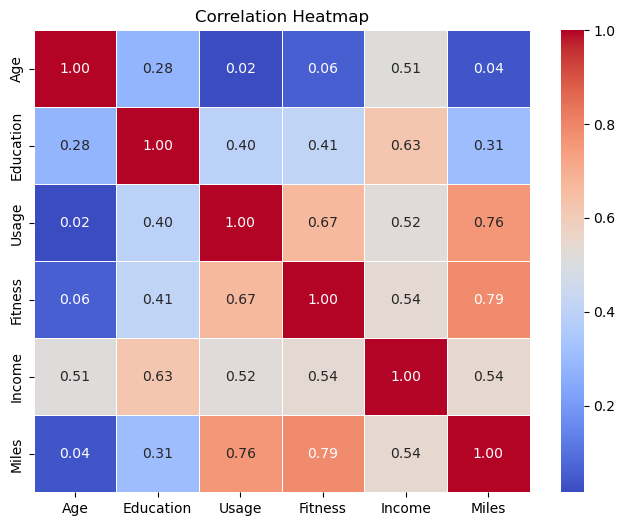

In [ ]:
# Calculate the correlation matrix
correlation_matrix = aerofit_df.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Create a cross-tabulation table with normalization (marginal probabilities)
marginal_probs = pd.crosstab(index=[aerofit_productprice_df['Gender'], aerofit_productprice_df['MaritalStatus'], aerofit_productprice_df['Fitness']],
                             columns='Percentage', normalize=True) * 100
# Rename the 'Percentage' column to 'Percentage of Customers'
marginal_probs.columns = ['Percentage of Customers']
marginal_probs

Percentage of Customers
Gender MaritalStatus Fitness                         
Female Partnered     2                       5.000000
                     3                      16.666667
                     4                       1.111111
                     5                       2.777778
       Single        1                       0.555556
                     2                       3.888889
                     3                       8.333333
                     4                       3.333333
                     5                       0.555556
Male   Partnered     1                       0.555556
                     2                       5.000000
                     3                      15.000000
                     4                       6.111111
                     5                       7.222222
       Single        2                       0.555556
                     3                      13.888889
                     4                       2.777778
                     5                       6.666667

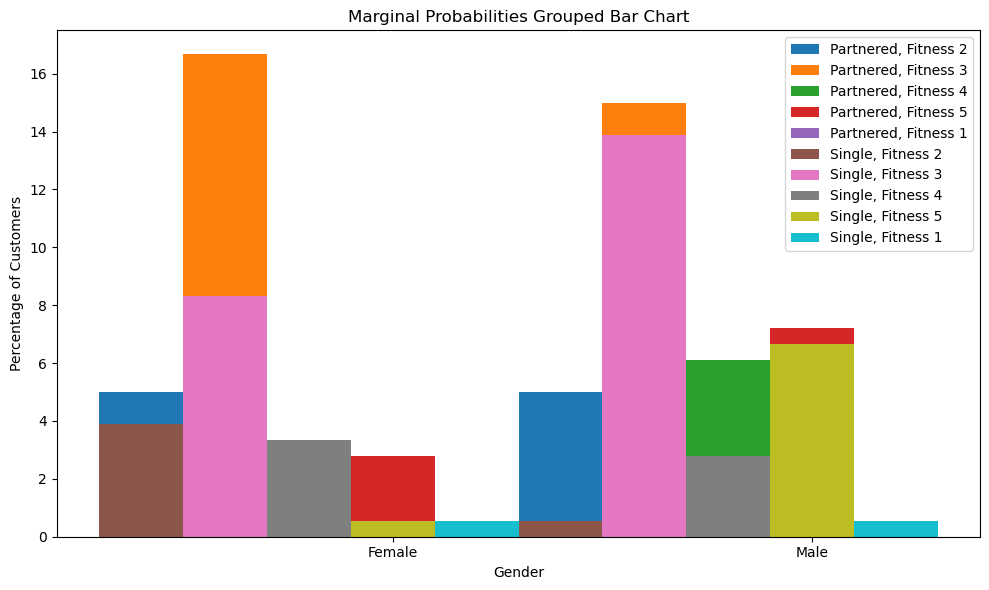

In [ ]:

# Extract the data for plotting
genders = marginal_probs.index.get_level_values('Gender').unique()
marital_statuses = marginal_probs.index.get_level_values('MaritalStatus').unique()
fitness_levels = marginal_probs.index.get_level_values('Fitness').unique()
product_names = marginal_probs.columns

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(genders))

for i, marital_status in enumerate(marital_statuses):
    for j, fitness_level in enumerate(fitness_levels):
        bars = ax.bar(index + bar_width * (j - 1), marginal_probs.xs((marital_status, fitness_level), level=('MaritalStatus', 'Fitness')).values.flatten(),
                      bar_width, label=f'{marital_status}, Fitness {fitness_level}')

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage of Customers')
ax.set_title('Marginal Probabilities Grouped Bar Chart')
ax.set_xticks(index + bar_width * (len(fitness_levels) - 1) / 2)
ax.set_xticklabels(genders)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Create a cross-tabulation table with normalization (marginal probabilities)
marginal_probs = pd.crosstab(index=aerofit_productprice_df['Gender'], columns='Percentage', normalize=True) * 100

# Rename the 'Percentage' column to 'Percentage of Customers'
marginal_probs.columns = ['Percentage of Customers']
marginal_probs

,Percentage of Customers
Gender,
Female,42.222222
Male,57.777778


In [ ]:
# Create a cross-tabulation table with normalization (marginal probabilities)
marginal_probs = pd.crosstab(index=aerofit_productprice_df['Product'], columns='Percentage', normalize=True) * 100

# Rename the 'Percentage' column to 'Percentage of Customers'
marginal_probs.columns = ['Percentage of Customers']
marginal_probs

,Percentage of Customers
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


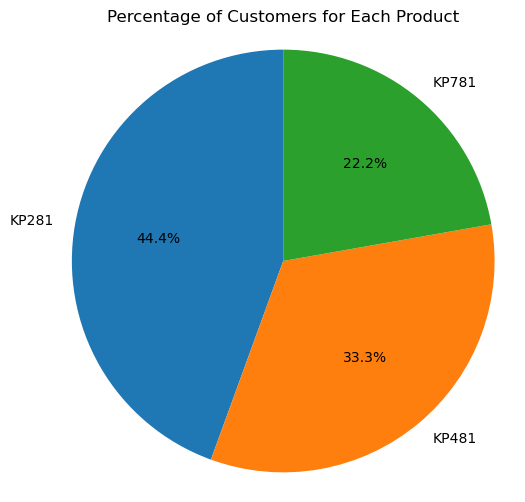

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(marginal_probs['Percentage of Customers'], labels=marginal_probs.index,
        autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Customers for Each Product')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

# Display the pie chart
plt.show()

Probability- marginal, conditional probability

In [ ]:
 #What is the probability of a male customer buying a KP781 treadmill?

# Create a cross-tabulation table for 'Gender' and 'Product'
cross_tab = pd.crosstab(index=aerofit_productprice_df['Gender'], columns=aerofit_productprice_df['Product'])

# Get the count of male customers who bought KP781
count_male_KP781 = cross_tab.loc['Male', 'KP781']
count_male_KP481 = cross_tab.loc['Male', 'KP481']
count_male_KP281 = cross_tab.loc['Male', 'KP281']
# Get the total count of male customers
total_male_customers = cross_tab.loc['Male'].sum()

# Calculate the probability of a male customer buying KP781, KP481,KP281
probability_male_KP781 = count_male_KP781 / total_male_customers
probability_male_KP481 = count_male_KP481 / total_male_customers
probability_male_KP281 = count_male_KP281 / total_male_customers
probability_male_product=  {
    'Product': ['KP281', 'KP481', 'KP781'],
    'probability': [round(probability_male_KP281*100,2),round(probability_male_KP481*100,2), round(probability_male_KP781*100,2)]
}
# probability_male_product = [round(probability_male_KP781*100,2),round(probability_male_KP481*100,2),round(probability_male_KP281*100,2)]
probability_male_product = pd.DataFrame(probability_male_product)

print(f"The probability of a male customer buying a KP781 treadmill is: {probability_male_KP781:.2%}")
print(f"The probability of a male customer buying a KP481 treadmill is: {probability_male_KP481:.2%}")
print(f"The probability of a male customer buying a KP281 treadmill is: {probability_male_KP281:.2%}")

The probability of a male customer buying a KP781 treadmill is: 31.73%
The probability of a male customer buying a KP481 treadmill is: 29.81%
The probability of a male customer buying a KP281 treadmill is: 38.46%


In [ ]:
probability_male_product

,Product,probability
0,KP281,38.46
1,KP481,29.81
2,KP781,31.73


In [ ]:
 #What is the probability of a male customer buying a KP781 treadmill?

# Create a cross-tabulation table for 'Gender' and 'Product'
cross_tab = pd.crosstab(index=aerofit_productprice_df['Gender'], columns=aerofit_productprice_df['Product'])

# Get the count of male customers who bought KP781
count_female_KP781 = cross_tab.loc['Female', 'KP781']
count_female_KP481 = cross_tab.loc['Female', 'KP481']
count_female_KP281 = cross_tab.loc['Female', 'KP281']
# Get the total count of male customers
total_female_customers = cross_tab.loc['Female'].sum()

# Calculate the probability of a male customer buying KP781, KP481,KP281
probability_female_KP781 = count_male_KP781 / total_male_customers
probability_female_KP481 = count_male_KP481 / total_male_customers
probability_female_KP281 = count_male_KP281 / total_male_customers
probability_female_product=  {
    'Product': ['KP281', 'KP481', 'KP781'],
    'probability': [round(probability_female_KP281*100,2),round(probability_female_KP481*100,2), round(probability_female_KP781*100,2)]
}
# probability_male_product = [round(probability_male_KP781*100,2),round(probability_male_KP481*100,2),round(probability_male_KP281*100,2)]
probability_female_product = pd.DataFrame(probability_female_product)

print(f"The probability of a female customer buying a KP781 treadmill is: {probability_female_KP781:.2%}")
print(f"The probability of a female customer buying a KP481 treadmill is: {probability_female_KP481:.2%}")
print(f"The probability of a female customer buying a KP281 treadmill is: {probability_female_KP281:.2%}")

The probability of a female customer buying a KP781 treadmill is: 9.21%
The probability of a female customer buying a KP481 treadmill is: 38.16%
The probability of a female customer buying a KP281 treadmill is: 52.63%


In [ ]:
probability_female_product

,Product,probability
0,KP281,52.63
1,KP481,38.16
2,KP781,9.21


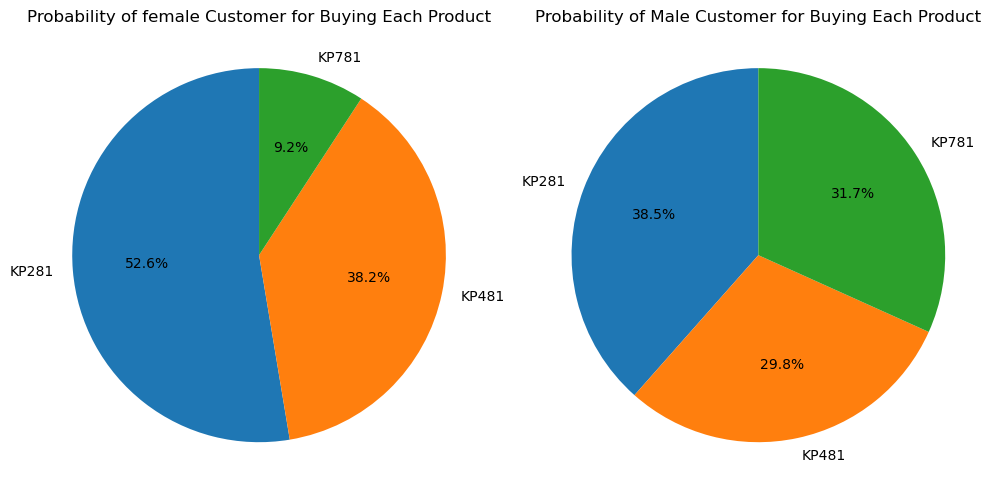

In [ ]:
# Create the countplot for 'Gender'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

# Plotting the pie chart

plt.pie(probability_female_product['probability'], labels=probability_female_product.Product,
        autopct='%1.1f%%', startangle=90)
plt.title('Probability of Female Customer for Buying Each Product')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.



# Create the histogram for 'Product_Price'
plt.subplot(1, 2, 2)

# Plotting the pie chart

plt.pie(probability_male_product['probability'], labels=probability_male_product.Product,
        autopct='%1.1f%%', startangle=90)
plt.title('Probability of Male Customer for Buying Each Product')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.


# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()

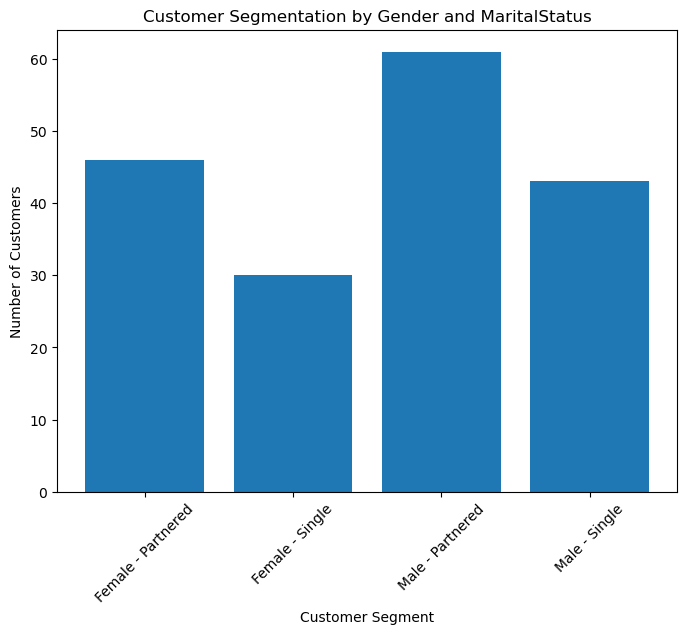

In [ ]:
customer_segments = aerofit_productprice_df.groupby(['Gender', 'MaritalStatus']).size().reset_index(name='Count')
# Create a bar chart to visualize customer segments
plt.figure(figsize=(8, 6))
plt.bar(customer_segments['Gender'] + ' - ' + customer_segments['MaritalStatus'], customer_segments['Count'])
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation by Gender and MaritalStatus')
plt.xticks(rotation=45)
plt.show()

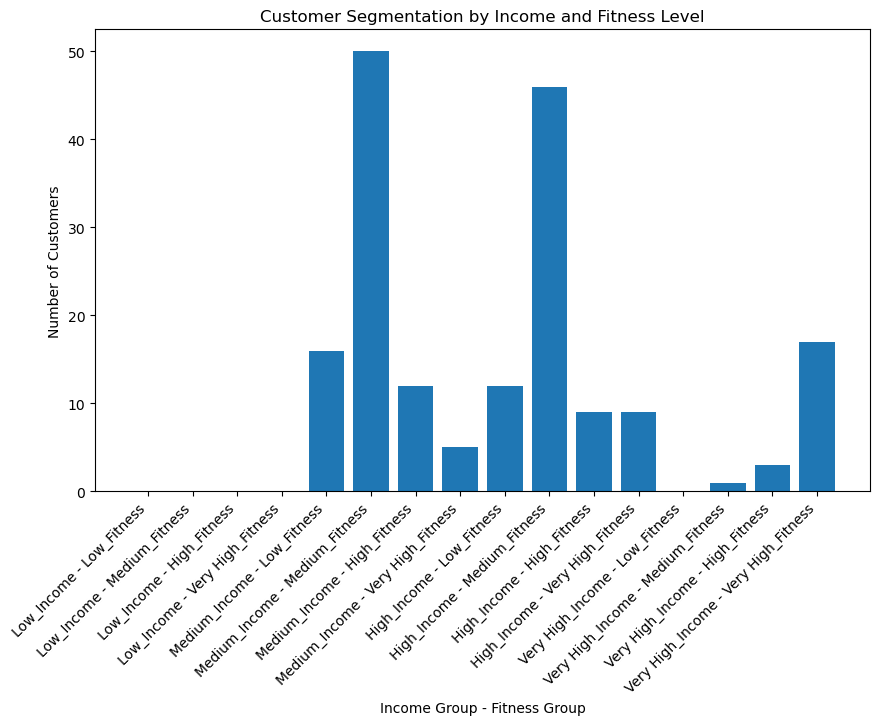

In [ ]:
# Define the bins for 'Income' and 'Fitness' level
income_bins = [0, 25000, 50000, 75000, float('inf')]
fitness_bins = [0, 2, 3, 4, float('inf')]

# Labels for the bins
income_labels = ['Low_Income', 'Medium_Income', 'High_Income', 'Very High_Income']
fitness_labels = ['Low_Fitness', 'Medium_Fitness', 'High_Fitness', 'Very High_Fitness']

# Add new columns for 'Income Group' and 'Fitness Group' based on the bins
aerofit_productprice_df['Income Group'] = pd.cut(aerofit_productprice_df['Income'], bins=income_bins, labels=income_labels)
aerofit_productprice_df['Fitness Group'] = pd.cut(aerofit_productprice_df['Fitness'], bins=fitness_bins, labels=fitness_labels)

# Perform customer segmentation based on 'Income Group' and 'Fitness Group'
customer_segments = aerofit_productprice_df.groupby(['Income Group', 'Fitness Group']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
x_ticks = [f'{income} - {fitness}' for income, fitness in zip(customer_segments['Income Group'], customer_segments['Fitness Group'])]
plt.bar(x_ticks, customer_segments['Count'])
plt.xlabel('Income Group - Fitness Group')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation by Income and Fitness Level')
plt.xticks(rotation=45, ha='right')
plt.show()

<h2> <b><i> **6. Business Insights**  </i></b></h2>
<h4>
<ol>
    <li>
        **Comparison of products based on marital status:** When analyzed the sales figures of different products on criteria of marital status, its evident that most popular product amongst partnered customers, is KP281 with 72000 purchase value, followed by KP481 with 63000 and KP781 with 57500 purchase value. However, amongst single customers, popularity of product remains the same with reduced purchase value, KP281 is most popular amassing 48000 purchase value followed by KP481 with 42000 and KP781 with 42500. <b> **Irrespective of model, married customers shows more interest in purchasing the fitness equipment than single customers.** </b> </li>
       <li>    
      **Customers segregated based on age:** Aerofit product's are purchased by Young customers (275000) more than Adult customers (50000). Customer database shows no sales to senior customers more than 50 years of age. KP281 is most selling product preferred by Young customers (99000) followed by KP481 (91000) and KP781 (85000), Whereas amongst adult customers KP781 (15000) outscored KP481 (14000). KP281 remains the most popular choice of Adult (21000) as well as Young customers (99000). </li>
     <li>
        <b>  **Income Impact on Product Choice:**</b>  By examining the counts based on the Income category, we can see that customers with lower income( means less than avarage income :53719.57 )  values tend to purchase fewer units of KP781 compared to those with higher income values. <b> This may indicate that KP781 is relatively more expensive and is preferred by customers with higher incomes.</b> </li>
    <li>
        <b> **Customers with a medium fitness level (3) are displaying a higher frequency of Aerofit product purchases, closely followed by those with a higher fitness level. This observation leads us to conclude that customers with medium fitness, particularly those who are partnered, exhibit a strong inclination towards purchasing Aerofit products.**  </b> </li>
</ol>
</h4>

<h2> <b><i> **7. Recommendations**  </i></b></h2>
<h3> Based on the analysis of the provided data, graphs, and DataFrames, here are some recommendations for the Aerofit business owner:</h3>
<h4>
<ol>
    <li>
        <b> **Product Performance Analysis:**</b>
   - Focus on KP781 Treadmill: KP781 has consistently shown the highest total sale amount, indicating it is the best-performing product in terms of revenue generated. The business owner should continue to prioritize this product and consider exploring opportunities to increase sales further.
    </li>
    <li>
         <b>**Targeted Marketing Strategies:**</b>
    - Customer Segmentation: Utilize customer segmentation based on various factors such as income, marital status, and gender to tailor marketing strategies. Understand the preferences and needs of different customer segments to deliver targeted promotions and offers. E.g <b>Customers with a medium fitness level (3) or higher, along with those in the medium income bracket, show a greater inclination for purchasing compared to other customer segments.</b>
    </li>
    <li>
        <b> **Pricing Optimization:**</b>
   - Price Sensitivity Analysis: Analyze the pricing strategy for each product based on customer segments. Consider offering special pricing or discounts to price-sensitive segments to attract more customers and increase sales. E.g. <b> Although the price of KP781 is higher, it offers a higher profit margin. By offering a strategic discount on the price of KP781, we can potentially encourage customers who would have otherwise purchased KP481 to opt for KP781, leading to increased sales and profitability. </b>
    </li>
    <li>
        <b> **Customer Retention Strategies:**</b>
   - Loyalty Programs: Implement loyalty programs to retain existing customers and encourage repeat purchases. Reward loyal customers with exclusive offers, discounts, or special access to new products.
    </li>
    <li>
        <b> **Market Expansion:**</b>
   - Explore New Markets: Analyze the possibility of expanding the business to new geographic locations. Identify potential markets where there is a demand for fitness products and evaluate the feasibility of expansion.
    </li>
    <li>
        <b> **Data-Driven Decision Making:**</b>
   - Use Analytics: Emphasize data-driven decision making. Continuously analyze sales data, customer behavior, and market trends to make informed decisions about product offerings, marketing strategies, and pricing.
    </li>
    <li>
        <b> **Customer Experience:**</b>
   - Focus on Customer Experience: Prioritize the overall customer experience, including pre-sales, sales, and after-sales service. Ensure that customers have a positive experience with the brand, leading to customer satisfaction and loyalty.E.g. <b> Customers with medium usage levels can be incentivized to utilize our products more frequently by offering complimentary exercise or fitness camps. Positive feedback and visible fitness improvements among these customers can attract more potential customers, driving further growth and loyalty to our brand.</b>
    </li>
    </ol>
</h4>
